<h1>Model Evaluation</h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn 
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.tree import DecisionTreeRegressor


In [2]:
#import data-set
train = pd.read_excel('train_optimized.xlsx')
test = pd.read_excel('test_optimized.xlsx')

In [3]:
train.head(3)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Visibility_mean_ratio,Operation_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.960069,14,1,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
test.head(3)

,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Visibility_mean_ratio,Operation_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,107.8622,0.007565,20.75,OUT049,1.029192,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,87.3198,0.038428,8.30,OUT017,1.130311,6,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,241.7538,0.099575,14.60,OUT010,1.735215,15,0,1,0,...,1,0,0,0,0,0,0,0,0,0


<h2>Baseline Model</h2>

Firstly, we create a baseline model, then we have a baseline to compare to other models, any model it's performance is lower than the baseline, caution us that the one is serious wrong somewhere.

In [5]:
#baseline model 1 ------use mean of Item_Outlet_Sales
mean_sales = train['Item_Outlet_Sales'].mean()
base = test[['Item_Identifier', 'Outlet_Identifier']].copy()
base['Item_Outlet_Sales'] = mean_sales
#base.to_csv('submit_baseline.csv', index=False)

#baseline model 2 -------use mean of Item_Outlet_Sales group by Item_Identifier
mean_item_ID = train.pivot_table(index='Item_Identifier', \
                                 values='Item_Outlet_Sales', aggfunc='mean')
#print('mean by item ID: \n', mean_item_ID, '\n\n')
base_2 = test[['Item_Identifier', 'Outlet_Identifier']].copy()
base_2['Item_Outlet_Sales'] = base_2['Item_Identifier'].apply\
                              (lambda x: mean_item_ID.loc[x, 'Item_Outlet_Sales'])
#print(base_2.head(), '\n\n')
#base_2.to_csv('submit_baseline_2_groupby_itemID.csv', index=False)

We can get the basleline model score: 1773 by submitting the result to <b><I>Analytics Vidhya</I></b>.

<h1>Generic function</h1>

We don't want to write the same codes repeatly, lest's define a generic function for futhur using, which fits the model, performs cross-validation, and generates submission. 

In [6]:
#train the model, performs cross-validation and generates submission

def modelfit(alg, dtrain, dtest, predictors_col, target_col, IDcol, filename):
    #Train the algorithm with training data
    alg.fit(dtrain[predictors_col], dtrain[target_col])


    #Predict result with training set:
    dtrain_predictions = alg.predict(dtrain[predictors_col])
    #Error of training data
    error_train = np.sqrt(metrics.mean_squared_error(dtrain[target_col].values, dtrain_predictions))

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors_col], dtrain[target_col], cv=20, scoring='neg_mean_squared_error')
    #print('cv score: ', cv_score, '\n\n')
    cv_score = np.sqrt(np.abs(cv_score)) 

    #Print model report:
    print(str(alg), "\nModel Report")
    print("RMSE of training-data : %.4g" % error_train)
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)), '\n\n')


    #Predict on testing data:
    dtest[target_col] = alg.predict(dtest[predictors_col])

    #Export submission file:
    #IDcol.append(target_col)
    #submission = pd.DataFrame({ x:dtest[x] for x in IDcol})
    #submission = dtest[IDcol].copy()
    #submission.to_csv(filename, index=False)


<h2>The First Linear Model</h2>

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) 
Model Report
RMSE of training-data : 1128
CV Score : Mean - 1129 | Std - 43.2 | Min - 1074 | Max - 1211 




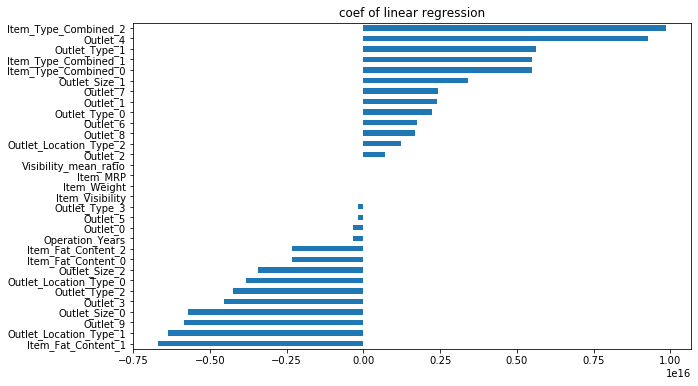

Item_Fat_Content_1       -6.677993e+15
Outlet_Location_Type_1   -6.348570e+15
Outlet_9                 -5.853700e+15
Outlet_Size_0            -5.701413e+15
Outlet_3                 -4.546542e+15
Outlet_Type_2            -4.241833e+15
Outlet_Location_Type_0   -3.832010e+15
Outlet_Size_2            -3.439485e+15
Item_Fat_Content_0       -2.312162e+15
Item_Fat_Content_2       -2.312162e+15
Operation_Years          -3.509757e+14
Outlet_0                 -3.412134e+14
Outlet_5                 -1.824797e+14
Outlet_Type_3            -1.824797e+14
Item_Visibility          -3.679645e+02
Item_Weight               2.982062e-01
Item_MRP                  1.556057e+01
Visibility_mean_ratio     1.113689e+02
Outlet_2                  6.916684e+14
Outlet_Location_Type_2    1.224281e+15
Outlet_8                  1.684866e+15
Outlet_6                  1.744595e+15
Outlet_Type_0             2.250185e+15
Outlet_1                  2.400258e+15
Outlet_7                  2.446547e+15
Outlet_Size_1            

In [7]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

algo_linear = LinearRegression(normalize=True)
modelfit(algo_linear, train, test, predictors, target, IDcol, 'submit_linear_model.csv')
coef = pd.Series(data=algo_linear.coef_, index=predictors).sort_values()
coef.plot(kind='barh', figsize=(10,6))
plt.title('coef of linear regression')
plt.show()
coef

In [8]:
train_size = np.linspace(0.001, 0.4, 100)
train_sizes, train_scores, valid_scores = learning_curve(algo_linear, train[predictors], train[target], train_sizes=train_size, cv=5, scoring='neg_mean_squared_error')

train_scores = pd.DataFrame(np.sqrt(np.abs(train_scores)))
valid_scores = pd.DataFrame(np.sqrt(np.abs(valid_scores)))
train_scores = train_scores.apply(lambda x: np.mean(x), axis=1)
valid_scores = valid_scores.apply(lambda x: np.mean(x), axis=1)

df_learn_curve = pd.DataFrame({'training size':train_sizes, 'training score': train_scores, 'validation score': valid_scores})

Text(0, 0.5, 'RMSE Error')

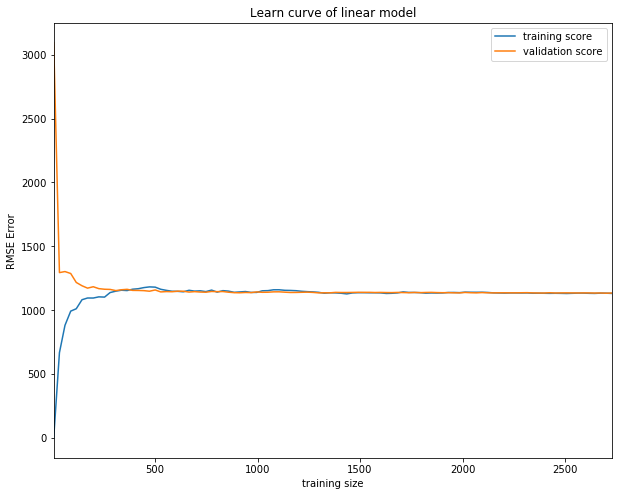

In [9]:
df_learn_curve.plot(kind='line', x='training size', figsize=(10,8))
plt.title('Learn curve of linear model')
plt.ylabel('RMSE Error')

Take a look at train-error and CV-error, they are very closed to each other, we also use 'learn curve' to evaluate this model, train error and CV error converge after 1000 examples, we are sure there is  no 'over-fitting', but we are not sure about if there are 'high-bias' in our model, therefore we can build a polynomial linear model, see if it has better performance. 

<h2>Polynomial Regression Model</h2>

In [10]:
deg = 2
algo_linear = LinearRegression(normalize=True, n_jobs=-1)
train_data = train[predictors]
#train_data = train[predictors].astype('float32')

poly = PolynomialFeatures(degree = deg) 
train_data_poly = poly.fit_transform(train_data)
#poly.fit(train_data_poly, train[target])
    
algo_linear.fit(train_data_poly, train[target])
train_predictions = algo_linear.predict(train_data_poly)
error_train = np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions))
cv_score = cross_val_score(algo_linear, train_data_poly, train[target], cv=20, scoring='neg_mean_squared_error', n_jobs=-1)
cv_score = np.sqrt(np.abs(cv_score))
    
print(str(algo_linear),'\nPolynomial: ', deg, "\nModel Report")
print("RMSE of training-data : %.4g" % error_train)
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)), '\n\n')



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True) 
Polynomial:  2 
Model Report
RMSE of training-data : 1067
CV Score : Mean - 1080 | Std - 45.64 | Min - 1009 | Max - 1163 




In [11]:
#train learn curve of poly model
train_size_poly = np.linspace(0.001, 0.4, 100)
train_sizes_poly, train_scores_poly, valid_scores_poly = learning_curve(algo_linear, train_data_poly, train[target], train_sizes=train_size_poly, cv=5, scoring='neg_mean_squared_error')

In [12]:
train_scores_poly = pd.DataFrame(np.sqrt(np.abs(train_scores_poly)))
valid_scores_poly = pd.DataFrame(np.sqrt(np.abs(valid_scores_poly)))
train_scores_poly = train_scores_poly.apply(lambda x: np.mean(x), axis=1)
valid_scores_poly = valid_scores_poly.apply(lambda x: np.mean(x), axis=1)

Text(0, 0.5, 'Error')

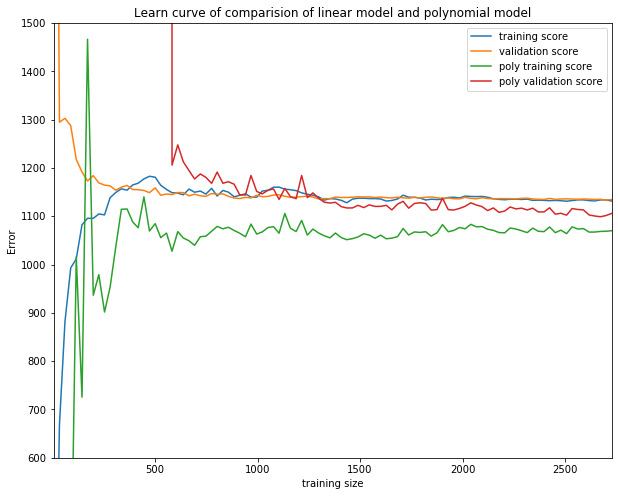

In [13]:
df_learn_curve_comparision = pd.DataFrame({'training size':train_sizes_poly, 'training score': train_scores, 'validation score': valid_scores , 'poly training score': train_scores_poly, 'poly validation score': valid_scores_poly})
df_learn_curve_comparision.set_index('training size', inplace=True)
df_learn_curve_comparision.plot(kind='line', figsize=(10,8), ylim=(600,1500))
plt.title('Learn curve of comparision of linear model and polynomial model')
plt.ylabel('Error')


<h2>Regularization</h2>

With this polynomial model, train-error and CV-error both are reduced, means the first linear model are too 'simple' to predict sales accurately, now we consider using regularization to optimize our model in further, we will create a lambda list which contains [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10], and see which one has reasonable error of training data and CV data.   

In [14]:
lambda_list = [0.0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
cv_list = np.zeros(len(lambda_list))
train_error_list = np.zeros(len(lambda_list))
target='Item_Outlet_Sales'
deg = 2


for ind, lam in enumerate(lambda_list):
    
    poly = PolynomialFeatures(degree = deg) 
    train_data_poly = poly.fit_transform(train_data) 
    #poly.fit(train_data_poly, train[target])
    
    algo_ridge = Ridge(alpha=lam, normalize=True)
    algo_ridge.fit(train_data_poly, train[target])
    train_predictions = algo_ridge.predict(train_data_poly)
    error_train = np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions))
    cv_score = cross_val_score(algo_ridge, train_data_poly, train[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #print(str(algo_linear),'\nPolynomial: ', deg, "\nAlpha: ", lam, "\nModel Report")
    #print("RMSE of training-data : %.4g" % error_train)
    #print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)), '\n\n')
    
    cv_list[ind] = np.mean(cv_score)
    train_error_list[ind] = error_train

    

,0,1,2,3,4,5,6,7,8,9
Lambda,0.000000,0.001000,0.003000,0.010000,0.030000,0.100000,0.300000,1.000000,3.000000,10.000000
Train error,1067.092342,1064.669758,1064.707202,1064.957281,1065.867479,1069.216613,1079.586653,1109.070164,1169.898538,1304.092850
CV error,1084.511529,1076.012938,1075.765240,1075.390755,1075.402247,1077.367265,1086.096354,1113.519066,1172.449049,1304.917416


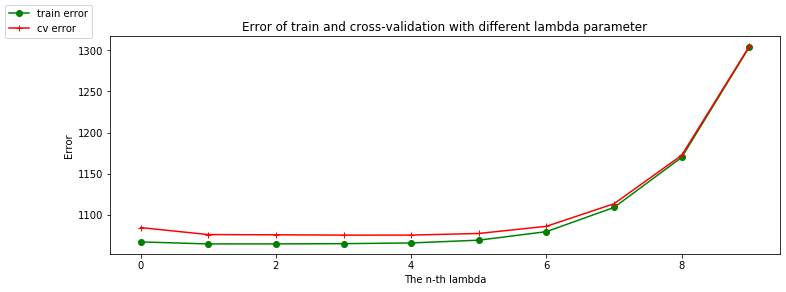

In [15]:
df_error = pd.DataFrame({'Lambda':lambda_list, 'Train error':train_error_list, 'CV error':cv_list})
plt.plot(range(len(lambda_list)),train_error_list, marker='o',color='green', label='train error')
plt.plot(range(len(lambda_list)),cv_list, marker='+', color='red', label='cv error')
plt.ylabel('Error')
plt.xlabel('The n-th lambda')
plt.title("Error of train and cross-validation with different lambda parameter")
fig = plt.gcf()
fig.set_size_inches(12,4)
fig.legend(loc='upper left')
df_error.transpose()

According to the above information, we can see the 0th ~ 3th lambda have similar performance, but the 2th lambda 0.01 has sightly better performance on preventing over-fitting, we choose 0.01 as our regularization parameter.

In [16]:
deg = 2
lam = 0.01
test_data = test[predictors]

poly = PolynomialFeatures(degree = deg) 
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)

    
algo_ridge = Ridge(alpha=lam, normalize=True)
algo_ridge.fit(train_data_poly, train[target])

#Predict on testing data:
test[target] = algo_ridge.predict(test_data_poly)

#Export submission file:
submission = test[IDcol+[target]].copy()
submission.to_csv('submit_linear_poly2_model_with_regularization_term_001.csv', index=False)

We submit our prediction of test data to <b><I>Analytics Vidhya</I></b>,  the score is 1155.

<h2>Outlier And Skewness</h2> 

We consider the distribution of target variable Item_Outlet_Sales in our training data, and recall the box-plot of outlier from data exploration section.

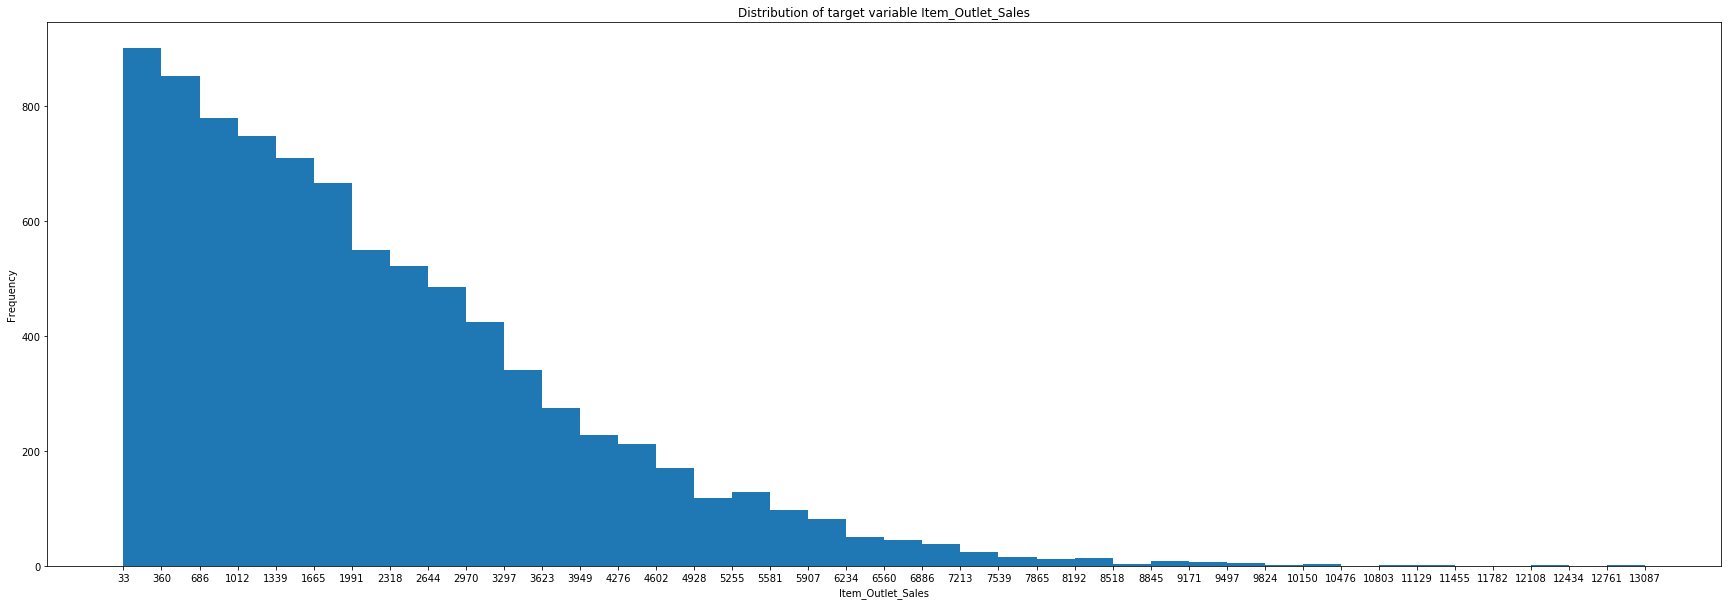

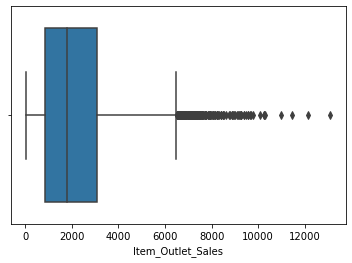

IQR of Item_Outlet_Sales:  2267.049 


Outlier of Item_Outlet_Sales: 
 False    8337
True      186
Name: Item_Outlet_Sales, dtype: int64 


Percentage of Item_Outlet_Sales outlier:  2 %


In [17]:
#plot distribution of item sales
item_sales = train['Item_Outlet_Sales'] 
count, bin_edges = np.histogram(item_sales, 40)
item_sales.plot(kind="hist", figsize=(30,10), xticks=bin_edges, bins=40)
plt.title('Distribution of target variable Item_Outlet_Sales')
plt.xlabel("Item_Outlet_Sales")
plt.show()

#calculate outlier and plot a box-chart
seaborn.boxplot(x='Item_Outlet_Sales', data=train)
plt.show()

train.shape[0]
Q1 = train['Item_Outlet_Sales'].quantile(0.25)
Q3 = train['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
outlier_of_target_var = (train['Item_Outlet_Sales'] < (Q1 - 1.5 * IQR)) | (train['Item_Outlet_Sales'] > (Q3 + 1.5 * IQR))
print('IQR of Item_Outlet_Sales: ', IQR, '\n\n')
print("Outlier of Item_Outlet_Sales: \n", outlier_of_target_var.value_counts(), '\n\n')

percent_outlier = 100 * sum(outlier_of_target_var==True) / train.shape[0]
print('Percentage of Item_Outlet_Sales outlier: ', round(percent_outlier), '%')

We can see there is a <I>right-skewed</I> distribution, maybe use the numerical transformation will get some improvment, let's try some methods
1. Log-transformation
2. Square-transformation   

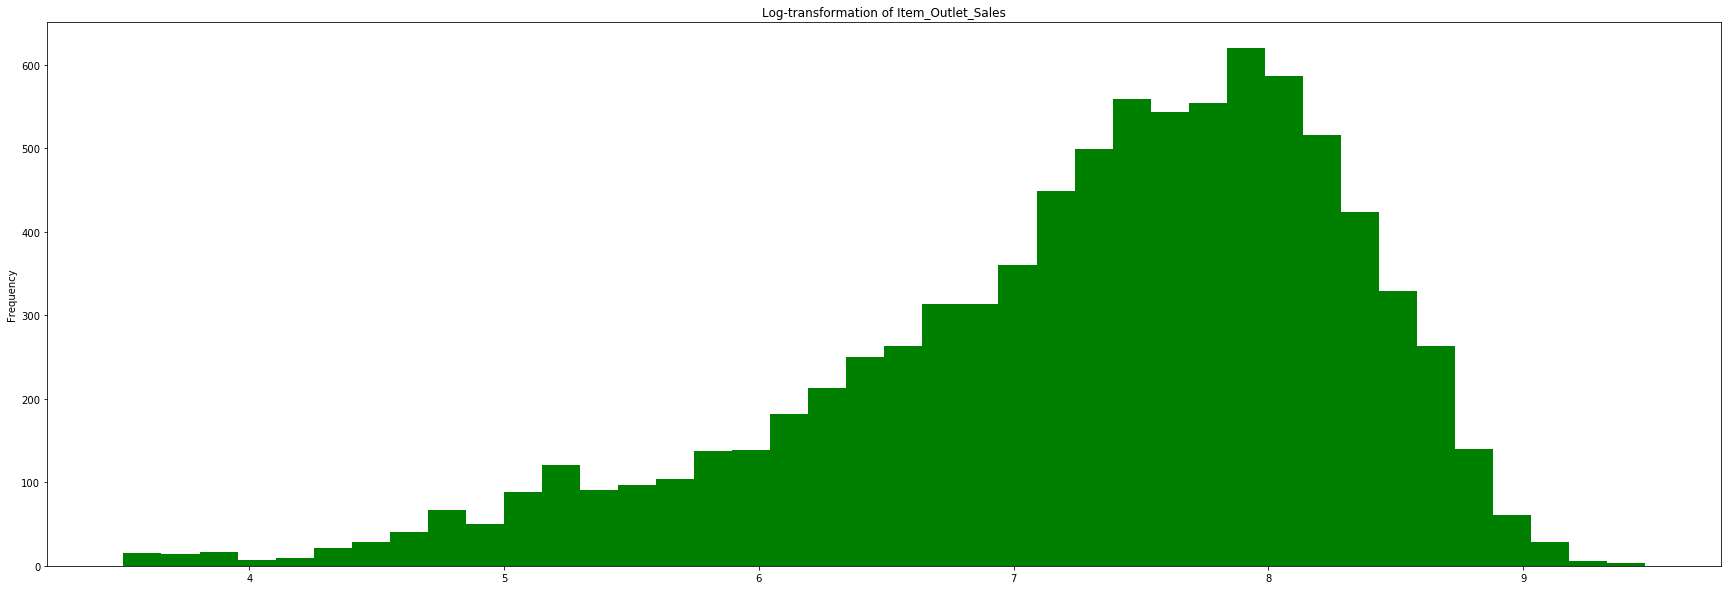

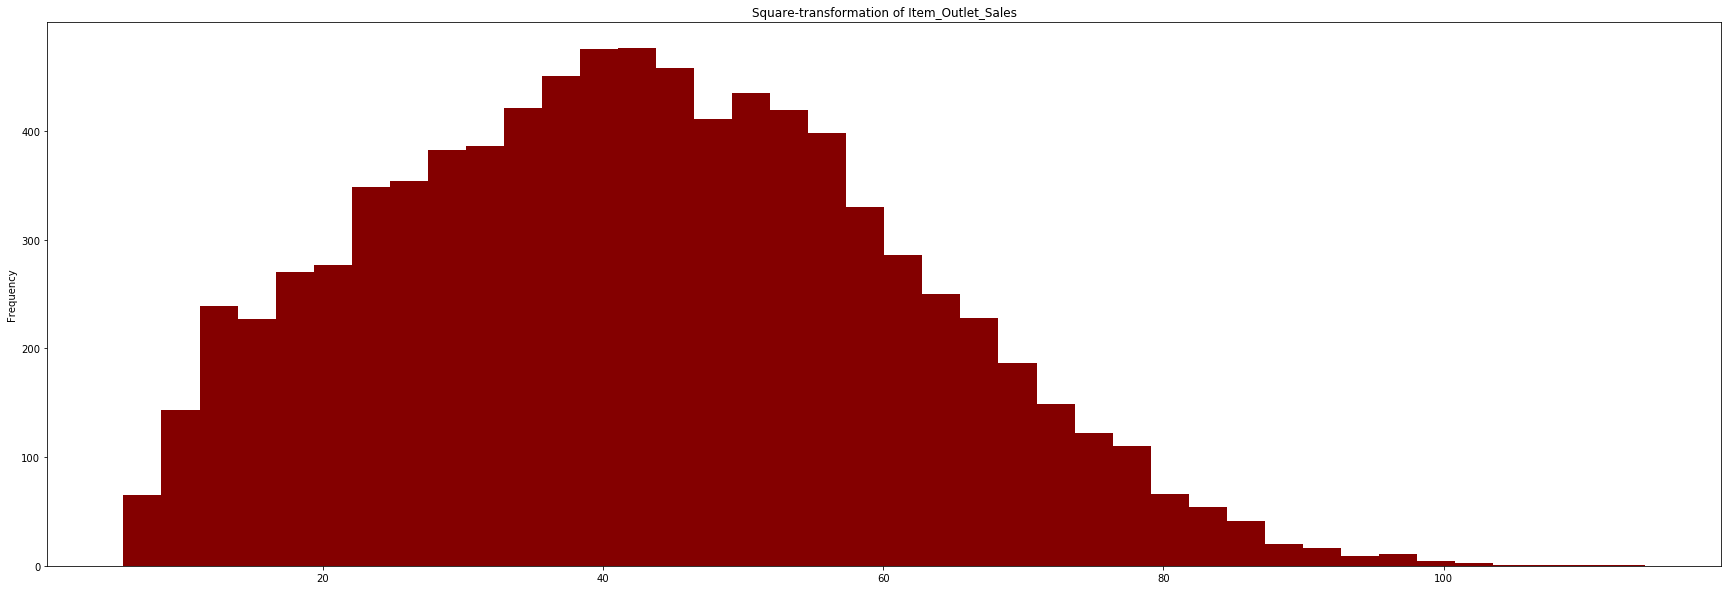

In [18]:
np.log(item_sales).plot(kind="hist", figsize=(30,10), bins=40, color='green')
plt.title('Log-transformation of Item_Outlet_Sales')
plt.show()
((item_sales)**0.5).plot(kind="hist", figsize=(30,10), bins=40, color='#840000')
plt.title('Square-transformation of Item_Outlet_Sales')
plt.show()

We can see the distributions after the both transformations are not quite good, and still are skewed. Therefore, we split the whole training data into 80% training data and 20% cross-validation data randomly, then we drop the outliers of training data, finally calculate the RMSE score of both data set, we repeat the precedure 20 times, and obtain the average of training error and CV error.

In [19]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

train_error_tol = 0
CV_error_tol = 0

#define the model and parameters
deg = 2
lam = 0.01
algo_ridge = Ridge(alpha=lam, normalize=True)
poly = PolynomialFeatures(degree = deg)

for num in range(1,21):
    #split training data into train-data and CV-data
    X_train, X_CV, y_train, y_CV = train_test_split(train[predictors], train[target], test_size=0.2)
    X_train[target] = y_train

    #get the training data without outlier
    Q1 = X_train[target].quantile(0.25)
    Q3 = X_train[target].quantile(0.75)
    IQR = Q3 - Q1
    outlier_of_target_var = (X_train[target] < (Q1 - 1.5 * IQR)) | (X_train[target] > (Q3 + 1.5 * IQR))
    train_without_outlier = X_train.loc[outlier_of_target_var==False, :].copy()
    train_data = train_without_outlier[predictors]

    CV_data_poly = poly.fit_transform(X_CV)
    train_data_poly = poly.fit_transform(train_data)

    #get train error and CV error    
    algo_ridge.fit(train_data_poly, train_without_outlier[target])
    train_predictions = algo_ridge.predict(train_data_poly)
    error_train = np.sqrt(metrics.mean_squared_error(train_without_outlier[target].values, train_predictions))
    CV_predictions = algo_ridge.predict(CV_data_poly)
    error_CV = np.sqrt(metrics.mean_squared_error(y_CV.values, CV_predictions))
    train_error_tol += error_train
    CV_error_tol += error_CV
    
    
print(str(algo_ridge),'\nPolynomial: ', deg, "\nModel Report")
print("Average RMSE of training-data : %.4g" % (train_error_tol/num))
print("Average RMSE of CV-data : %.4g" % (CV_error_tol/num))


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001) 
Polynomial:  2 
Model Report
Average RMSE of training-data : 956.5
Average RMSE of CV-data : 1093


Let's recall training and CV error with outliers: 1064.957281 and 1075.390755, after remove outliers, training error is reduced, however CV error increase to 1091, it is more "high variance", we try to increase lambda(regularization parameter), and see if the model performance gets improved. 

In [20]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

#define the model and parameters
deg = 2
poly = PolynomialFeatures(degree = deg)

lambda_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
cv_list = np.zeros(len(lambda_list))
train_error_list = np.zeros(len(lambda_list))

for ind, lam in enumerate(lambda_list):
    algo_ridge = Ridge(alpha=lam, normalize=True)
    train_error_tol = 0
    CV_error_tol = 0

    for num in range(1,21):
        #split training data into train-data and CV-data
        X_train, X_CV, y_train, y_CV = train_test_split(train[predictors], train[target], test_size=0.2)
        X_train[target] = y_train

        #get the training data without outlier
        Q1 = X_train[target].quantile(0.25)
        Q3 = X_train[target].quantile(0.75)
        IQR = Q3 - Q1
        outlier_of_target_var = (X_train[target] < (Q1 - 1.5 * IQR)) | (X_train[target] > (Q3 + 1.5 * IQR))
        train_without_outlier = X_train.loc[outlier_of_target_var==False, :].copy()
        train_data = train_without_outlier[predictors]

        CV_data_poly = poly.fit_transform(X_CV)
        train_data_poly = poly.fit_transform(train_data)

        #get train error and CV error    
        algo_ridge.fit(train_data_poly, train_without_outlier[target])
        train_predictions = algo_ridge.predict(train_data_poly)
        error_train = np.sqrt(metrics.mean_squared_error(train_without_outlier[target].values, train_predictions))
        CV_predictions = algo_ridge.predict(CV_data_poly)
        error_CV = np.sqrt(metrics.mean_squared_error(y_CV.values, CV_predictions))
        train_error_tol += error_train
        CV_error_tol += error_CV
    #for end 
    
    cv_list[ind] =   CV_error_tol/num
    train_error_list[ind] = train_error_tol/num
#for end

,0,1,2,3,4,5,6
Lambda,0.010000,0.030000,0.100000,0.300000,1.000000,3.000000,10.000000
Train error,952.601671,955.456690,960.549460,971.396733,994.246172,1044.099030,1161.932119
CV error,1103.576745,1098.816134,1099.787837,1096.426787,1153.512870,1198.046141,1350.600036


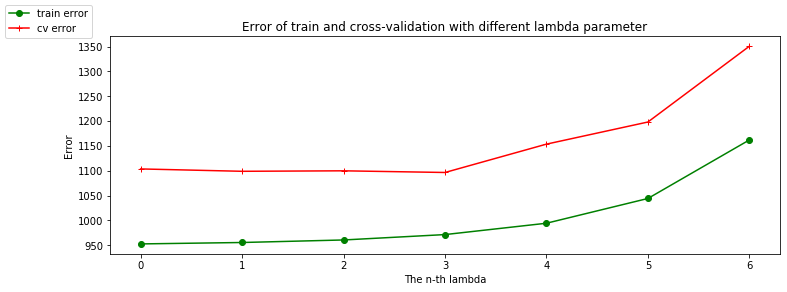

In [21]:
df_error = pd.DataFrame({'Lambda':lambda_list, 'Train error':train_error_list, 'CV error':cv_list})
plt.plot(range(len(lambda_list)),train_error_list, marker='o',color='green', label='train error')
plt.plot(range(len(lambda_list)),cv_list, marker='+', color='red', label='cv error')
plt.ylabel('Error')
plt.xlabel('The n-th lambda')
plt.title("Error of train and cross-validation with different lambda parameter")
fig = plt.gcf()
fig.set_size_inches(12,4)
fig.legend(loc='upper left')
df_error.transpose()

Look at relationship of error of training and cross-validation, the CV error has no improvment by increasing lambda, so we reserve the outliers, and consider it just as extreme value rather than outlier, because they are valuable to make prediction within the polynomial regression model.

<h2>Decision Tree Model</h2>

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 
Model Report
RMSE of training-data : 1058
CV Score : Mean - 1091 | Std - 45.28 | Min - 1003 | Max - 1187 




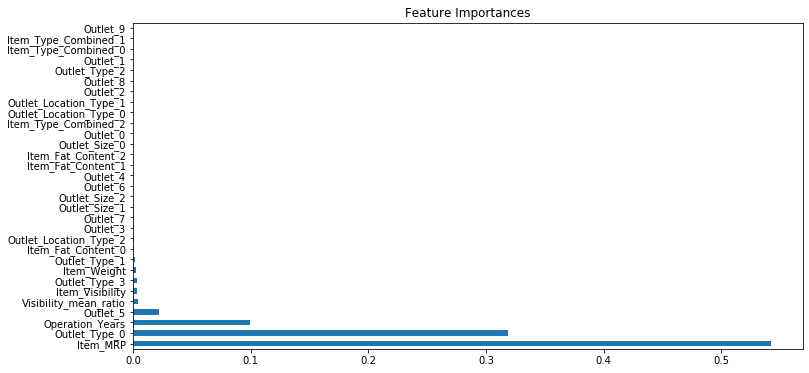

In [22]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg_dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
modelfit(alg_dt, train, test, predictors, target, IDcol, 'submit_decision_tree.csv')
coef_3 = pd.Series(alg_dt.feature_importances_, predictors).sort_values(ascending=False)
coef_3.plot(kind='barh', title='Feature Importances', figsize=(12,6))

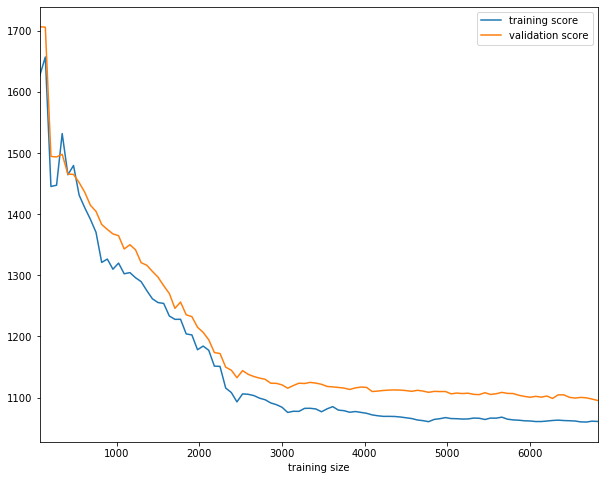

In [23]:
train_size = np.linspace(0.01, 1.0, 100)
train_sizes, train_scores, valid_scores = learning_curve(alg_dt, train[predictors], train[target], train_sizes=train_size, cv=5, scoring='neg_mean_squared_error')

train_scores = pd.DataFrame(np.sqrt(np.abs(train_scores)))
valid_scores = pd.DataFrame(np.sqrt(np.abs(valid_scores)))
train_scores = train_scores.apply(lambda x: np.mean(x), axis=1)
valid_scores = valid_scores.apply(lambda x: np.mean(x), axis=1)

df_learn_curve = pd.DataFrame({'training size':train_sizes, 'training score': train_scores, 'validation score': valid_scores})
df_learn_curve.plot(kind='line', x='training size', figsize=(10,8))

We also use learn curve to evaluate the decision tree model, we will know this model is slightly over-fitting, because of the gap of train and CV error, let's try to only reserve top-5 important features, reduce tree depth and increase minimum samples of leaf node. 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.05, min_impurity_split=None,
                      min_samples_leaf=130, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 
Model Report
RMSE of training-data : 1072
CV Score : Mean - 1089 | Std - 42.35 | Min - 1023 | Max - 1175 




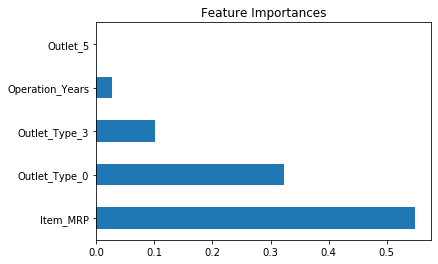

In [24]:
predictors = ['Item_MRP', 'Outlet_Type_0', 'Operation_Years', 'Outlet_Type_3', 'Outlet_5']
alg_dt2 = DecisionTreeRegressor(max_depth=6, min_samples_leaf=130, min_impurity_decrease=0.05)
modelfit(alg_dt2, train, test, predictors, target, IDcol, 'submit_decision_tree_2.csv')
coef_4 = pd.Series(alg_dt2.feature_importances_, predictors).sort_values(ascending=False)
coef_4.plot(kind='barh', title='Feature Importances')

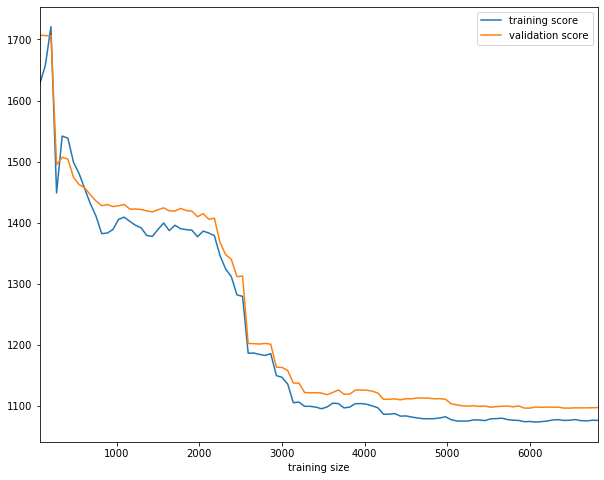

In [25]:
train_sizes, train_scores, valid_scores = learning_curve(alg_dt2, train[predictors], train[target], train_sizes=train_size, cv=5, scoring='neg_mean_squared_error')

train_scores = pd.DataFrame(np.sqrt(np.abs(train_scores)))
valid_scores = pd.DataFrame(np.sqrt(np.abs(valid_scores)))
train_scores = train_scores.apply(lambda x: np.mean(x), axis=1)
valid_scores = valid_scores.apply(lambda x: np.mean(x), axis=1)

df_learn_curve = pd.DataFrame({'training size':train_sizes, 'training score': train_scores, 'validation score': valid_scores})
df_learn_curve.plot(kind='line', x='training size', figsize=(10,8))

After the tune of parameters, the gap of train and CV error get smaller.

<h2>End Note</h2>

At the end of this project, we go through the entire journey of solving a data science problem, features exploration and data clean get our data be ready, and we tried to build several models, finally we use different methods to evaluat model performance, like choosing the best lambda by cross-validation, checking high bias / high variance by learn curve, and outliers investigation.    